# Example importing from classes
This is just to test whether the classes that I built work appropriately

In [117]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

from network import MinaNetwork

In [123]:
### Structure paramters
N_input = 200  # Inputs size
N_recurrent = 200  # C3 size
v = 4   # Input - C3 connection
b = 21.0   # Input - C1 connection
Kr = 0.20   # Recurrent self-inhibition gain
Ki = 0.3  # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.5  # Inhibition from C3 to C1
p = 0.5   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(N_input=N_input, N_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

# Build the patterns
number_of_patterns = 20
sparsity = 10
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

In [124]:
# Training
sequence1 = [0, 1, 2, 3, 4]
# sequence2 = [8, 9, 10, 11, 12]
epsilon = 0.1
training_time = 200

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, 
                              sequence=sequence1, save_quantities=True)
# nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2)

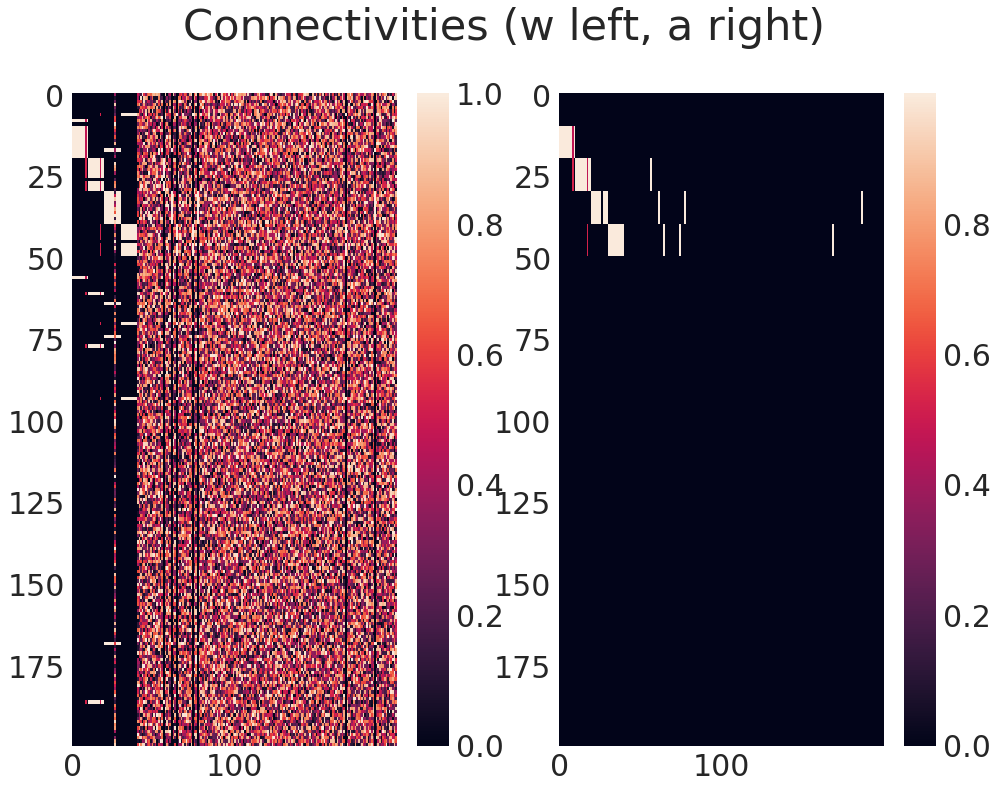

In [125]:
fig = plt.figure(figsize=(16, 12))

fig.suptitle('Connectivities (w left, a right)')

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(nn.w, aspect='auto')
ax1.grid()

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(nn.a, aspect='auto')
ax2.grid()

fig.colorbar(im1, ax=ax1);
fig.colorbar(im2, ax=ax2);

In [126]:
m = quantities['m']

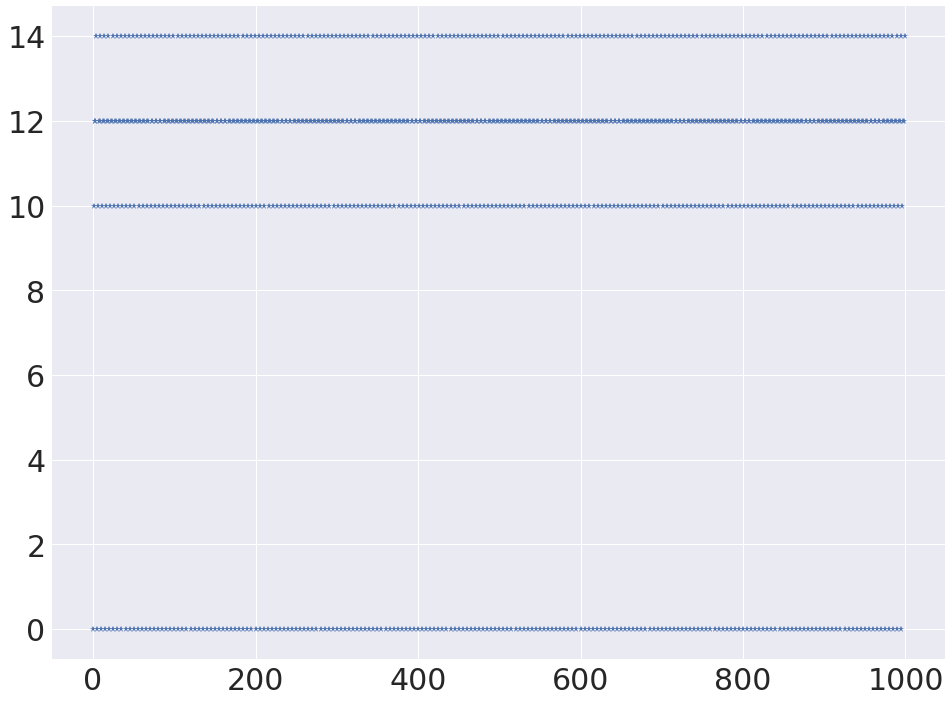

In [127]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ln = ax.plot(m, '*')